# About The Petersen Graph
## Class Directed Learning
### Due: Tuesday, 16 March 2021, 11:59 pm

## TODO Explore and Wonder

The Petersen graph is described as the complement of the line graph of $K_5$.

Draw each step of this construction using any graph-drawing tools in your toolbox.

Teach one another how to use the tools you each have.

Collaborators for CDL: Durid Ahmad and Jarom Lybbert

Original code written by Bretton Steiner

In [1]:
class GraphNode():
  def __init__(self, value = 0, links = []):
    self.value = value
    self.links = links

  def is_link(self, neighbor_value):
    if neighbor_value in links:
      return True
    return False

  def add_link(self, neighbor_value):
    if not neighbor_value in self.links:
      self.links.append(neighbor_value)

  def remove_link(self, neighbor_value):
    link.remove(neighbor_value)

  def __eq__(self, node):
    return self.value == node.value and set(self.links) == set(node.links)

In [2]:
class Graph():
  def __init__(self, nodes = [], links = []):
    self.nodes = []
    for node in nodes:
      adjacent_nodes = [link[1] for link in links if link[0] == node] + [link[0] for link in links if link[1] == node]
      self.nodes.append(GraphNode(node, adjacent_nodes))

  def get_node(self, node_value):
    return next(graphNode for graphNode in self.nodes if graphNode.value == node_value)

  def get_nodes(self):
    return [node.value for node in self.nodes]

  def get_links(self):
    links = [str(adj_list[0]) + str(adjacent_node) for adj_list in self.get_adjacency_list() for adjacent_node in adj_list[1]]
    return list(set(tuple(sorted(link)) for link in links))

  def get_adjacent_nodes(self, node_value):
    node = self.get_node(node_value)
    return (node.value, node.links)

  def get_adjacency_list(self):
    return [(graphNode.value, graphNode.links) for graphNode in self.nodes]

  def is_adjacent(self, node_from, node_to):
    self.add_node(node_from)
    node = self.get_node(node_from)
    return node.is_link(node_to)

  def add_node(self, node_value, links = []):
    if not node_value in self.get_nodes():
      self.nodes.append(GraphNode(node_value, links))

  def add_link(self, node_from, node_to):
    self.add_node(node_from)
    node = self.get_node(node_from)
    if not node.is_link(node_to):
      node.add_link(node_to)
    self.add_node(node_to)
    node = self.get_node(node_to)
    if not node.is_link(node_from):
      node.add_link(node_from)

In [3]:
import graphviz

links = []

In [4]:
def display_graph(graph, engine = 'fdp'):
  graphic = graphviz.Graph(format='png')
  graphic.edges([str(link[0]) + str(link[1]) for link in graph.get_links()])
  graphic.engine = engine
  return graphic

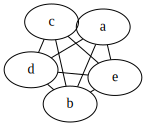

In [11]:
nodes = ['a', 'b', 'c', 'd', 'e']
links = [
  ('a', 'b'), ('a', 'c'), ('a', 'd'), ('a', 'e'), ('b', 'c'), ('b', 'd'), ('b', 'e'), ('c', 'd'), ('c', 'e'),
  ('d', 'e')
]

k5 = Graph(nodes, links)
display_graph(k5, 'neato')

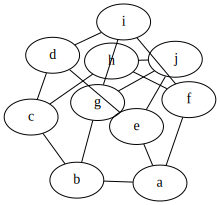

In [12]:
nodes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
links = [
  ('a', 'b'), ('a', 'e'), ('a', 'f'), ('b', 'c'), ('b', 'g'), ('c', 'd'), ('c', 'h'), ('d', 'e'), ('d', 'i'),
  ('e', 'j'), ('f', 'h'), ('f', 'i'), ('g', 'i'), ('g', 'j'), ('h', 'j')
]

petersen = Graph(nodes, links)
display_graph(petersen, 'neato')

Getting the in between is a work in progress. Also working to get the peterson graph to look cleaner